# Ch 8: Dimensionality Reduction



Dimensional reduction -reducing the number of features-- is helpful because it makes the algos run faster and it helps with communicating more easily via data visualization. 

In this Ch. we go thru two main appraoches to dim reduction: 
1. Projection 
2. Manifold Leraning

And, we go thru 3 of the most popular techniques:
1. PCA 
2. Kernel PCA
3. LLE

# The Curse of Dimnesionality

The more dimensions the training set has, the higher the risk of overfitting --as the dimensionality goes up, the distance btw any random 2 points in the space increases. 

# Main Approaches for Dim Reduction

## Projection

If a 3D dataset seems to lie close to a lower dim subspace, we can project the higher onto the lower:

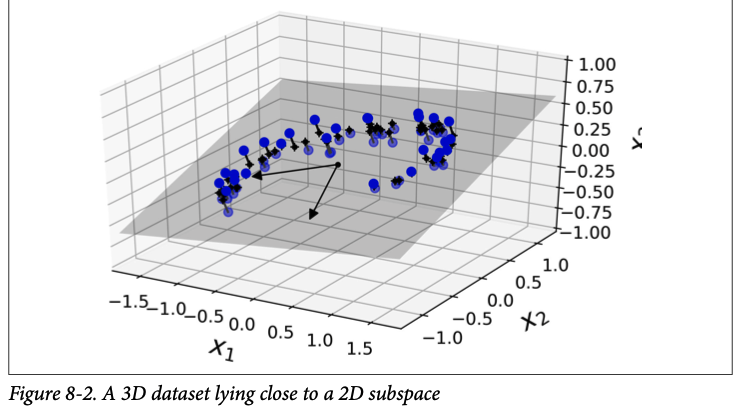

## Manifold Learning
2D manifold is when a 2D shape can be bent and twisted in a higher dim space: 
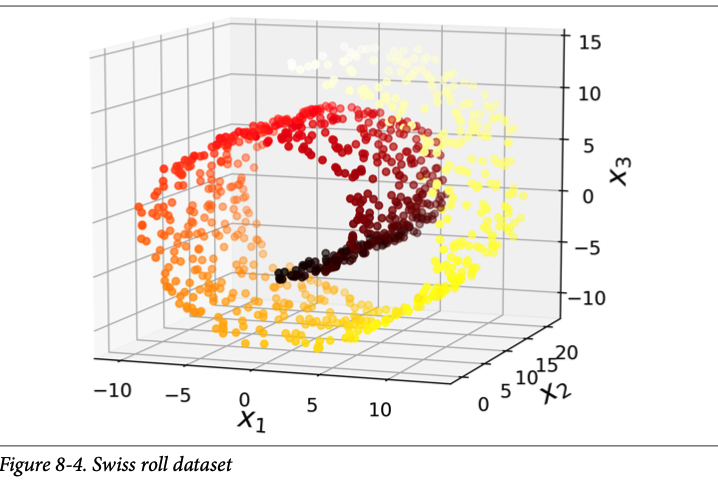
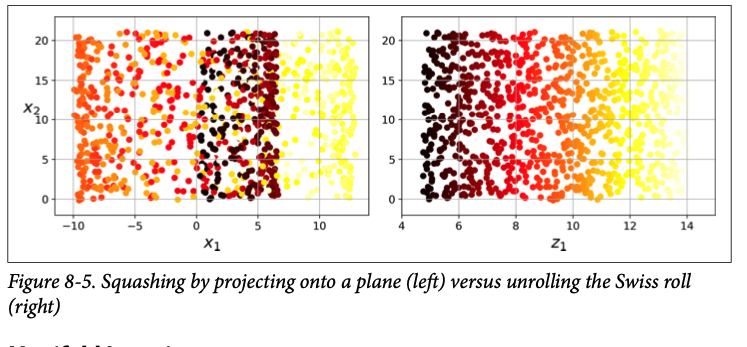


## PCA

### Preserving the Variance

Before projecting the training set onto a lower dim hyperplane, you need to choose the right hyperplane. Look at the image below; on the right you will see projections of the data onto the three different planes. We want to go for the first one (solid line) since it preserves the max vairance --it is less likley to lose important info compared to the other projections. Also, it minimizeds the mean squared distance btw the OG dataset and its projection on that axis. 

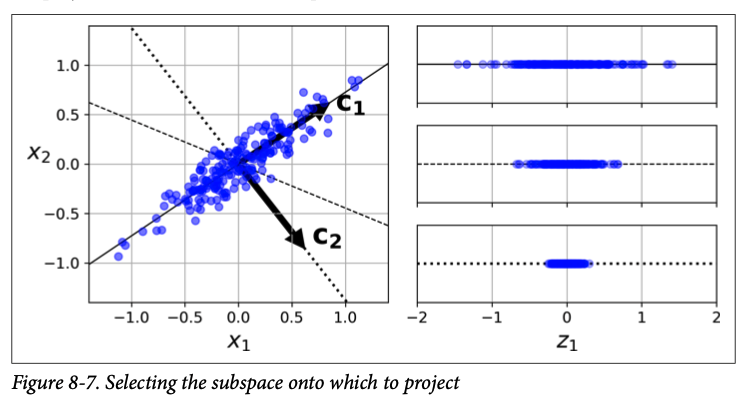

### Principal Components

To find the principle components of a training set, sklearn has a standard matrix factorization technique called _singular value Decomposition_ (SVD) that decomoposes the trianing set matrix X into the the matrix multiplication of three matrices (see below) where V contians all the prinicpal components that we are looking for. 


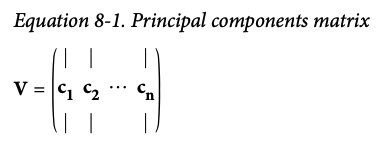

The following code uses NumPy svd() function to obtain all the principle components of the training set, then extractts thte first two PCs:

In [2]:
X_centered = X - X.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

NameError: name 'X' is not defined

PCA assumes dataset is centered around the origin. Sklearn PCA classes takes care of centering the data for you. 

## Projecting Down to Dimensions

Once all principal components are identified, you can reduce the dim of dataset down to d dimensions by projecting it onto the hyperplane defined by first d principle components. In Fig 8-2 from before, the 3D datset was projected down to 2D plan defined by the first two princ componenets --chosen b/c they preserved the most amount of var. 

To accomplish this reduction of the dataset, you can simply compute the matrix multiplciation of the training set matrix X by the matrix W<sub>d</sub>, defined as the matrix containing the first d princ component:

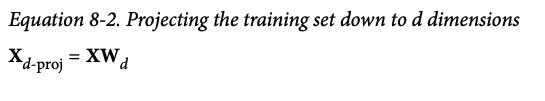



In [3]:
# The following code projects the training set on the plane defined by the first two principal components: 

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

NameError: name 'Vt' is not defined

You now know how to reduce the dim of any dataset down tot any number of dimensions --while preserving aas much varaince as possible!

## Using Scikit-Learn

The folllowing code applies PCA to reduce the dimensionality of dataset down to 2D (centering is automatically taken care of):


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

# After fitting the PCA transformer to the dataset, youc an access principal components using components_variable

NameError: name 'X' is not defined

## Explained Variance Ratio 

Another useful features is the explained variance ratio of each prinicpal component, indicating the proportion of the dataset's var that lies along the axis of each principal component. 

In [6]:
pca.explained_variance_ratio_


AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

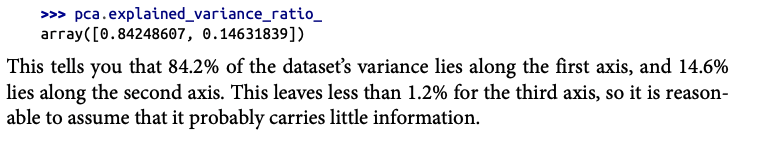

## Choosing the right number of dimensions

You generally want to reduce the number of dims so that the number of dims add up to around 95% of the varainces. But if you are doing data visualization --you want to aorund 2 or 3 dims


In [7]:
# This code computers PCA without reducing dimensionality, 
# then computes the min number of dimensions requried to preserve 95% of the training set's variance: 

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

NameError: name 'X_train' is not defined

You could then set n_components = d and run PCA again, however, there is a better option.

Youj could set n_components = a float btw 0 and 1 indicating the ratio of the variance you wish to preserve. 

In [8]:
pca = PCA(n_components= 0.95)
X_reduced = pca.fit_transform(X_train)

NameError: name 'X_train' is not defined

Yet another option, is to plot the explained variance as a function of the number of dims (plot cumsum-- see figure below). There will usually be an elbow in the curve where the explained variance stops growing fast. YOu can think of this as an intrinsic dimensionality fo the dataset. You can see that reducing down to 100 dims wouldn't lose too much explained var. 

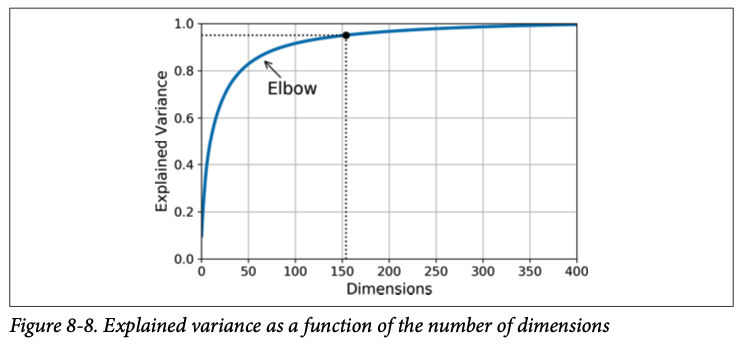

## PCA for Compression

If you appy PCA to the MNIST dataset while preserving 95% fo the variance, you will get a reduction to 150 from 784 features ~20% of its OG size. This will speed up classification algos (such as SVM) tremendously. 

You could also decompress reduced datasets back to the 784 dims by applyign the inverse transformation, but there will be some loss of precision (see code below):

In [9]:
pca = PCA(n_components = 154) # compressed down to 154 dims
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

NameError: name 'X_train' is not defined

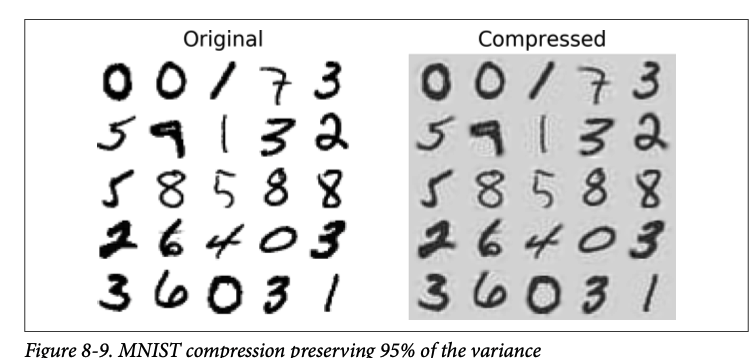

## Randomized PCA

If you set the svd_solver hyperparam to "randomized" sklearn will use a stochastic algo called _randomized pca_ that quicly finds approx of first d prinicpal components. See the code below:


In [10]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized")
X_reduced = rnd_pca.fit_transform(X_train)

NameError: name 'X_train' is not defined

## Incremental PCA 

One problem with the previous method is that it requires the whole training set to be read into memory. Incremental PCA is a solution that has been developed: you can split your training data into mini- batches that can be fed into the IPCA alao one mini-batch at a time. 

The following code splits the MNIST dataset into 100 mini-batches then feeds them to Sklearn to reduce the dim of the MNIST dataset down to 154 dims. 

In [12]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

NameError: name 'np' is not defined

Alternatively, you can use NumPy's memmap class to manipulate a large array stored in binary file on disk as if it were entirely in memory --only loads data it needs in the memory. See code below:

In [13]:
X_mm = np.memmap(filename, dtype = "float32", mode = "readonly", shape = (m,n))

batch_size = m // n_batches 
inc_pca = IncremetalPCA(n_components = 154, batch_size = batch_size)
inc_pca.fit(X,mm)

NameError: name 'np' is not defined

## Kernel PCA

In Ch 5 we talked about the kernel trick --math technique that implicitly maps instances into a high-dim space enabling nonlinear classification and regression with Support Vector Machines. 

The same concept can be used with PCA to perform complex nonlinear projections for dim redcution called _Kernel PCA (kPCA)_. It is good at preserving clusters of instances after projection and unrolling datasets that lie close to a twisted manifold. 

The following e.g code uses SKlearn _KernelPCA_ class ot perform kPCA w/ a RBF kernel:


In [15]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

NameError: name 'X' is not defined

Some e.g. of the kind of reduction that are possible: 
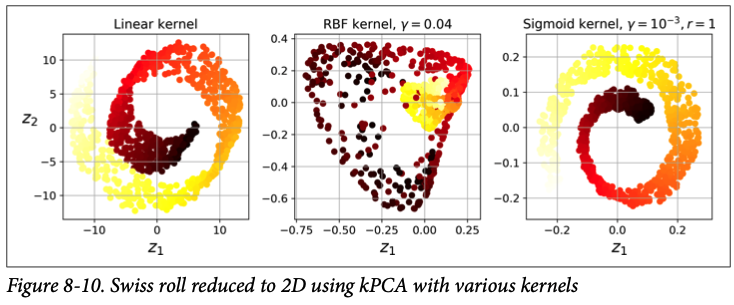

## Selecting a Kernel and Tuning the Hyperparameters

kPCA is an unsupervised learning algo, so tehre is no obvious performance measure to help select the best kernel and hyperparamter values. Dim reduction is often a prep step for supervised learning tasks (e.g., classification) -- youu can use grid serach to sleelct the kernel and hyperparameters that lead to best performance on the task. 

In [18]:
# Code creates a 2 step pipeline, first reducing dim to 2 using kPCA, then applying Log regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components = 2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [(
        "kpca__gamma": np.linespace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    )]
    
grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

SyntaxError: invalid syntax (<ipython-input-18-7ae7bb0ea829>, line 13)

In [19]:
# The best kernel and hyperparameters are available thru the best_params_ var

print(grid_search.best_params_)

NameError: name 'grid_search' is not defined

Another approach --this time entirely unsupervised-- is based on finding the kernel and hyperparameter that has the lowest reconstruction error --its a bit more complicated tho, but you can look it up further if you are interested in using it. 

## LLE 

Locally Linear Embeding (LLE) is another V powerful nonlinear dim reduction technique. Its a manifold learning technique that doesn't rely on projections like the previous algos. It works by first measuring how each training instance lienarly relates to its closest neightbors (.n.) then looks for a lower dim representation of the training set where these local relationships are best preserved. 

Here is an e.g. using the Swiss roll dataset.



In [20]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

NameError: name 'X' is not defined

This is what the reduction into 2D looks like! This method uses a K-nearest neighbors-esce methodology.
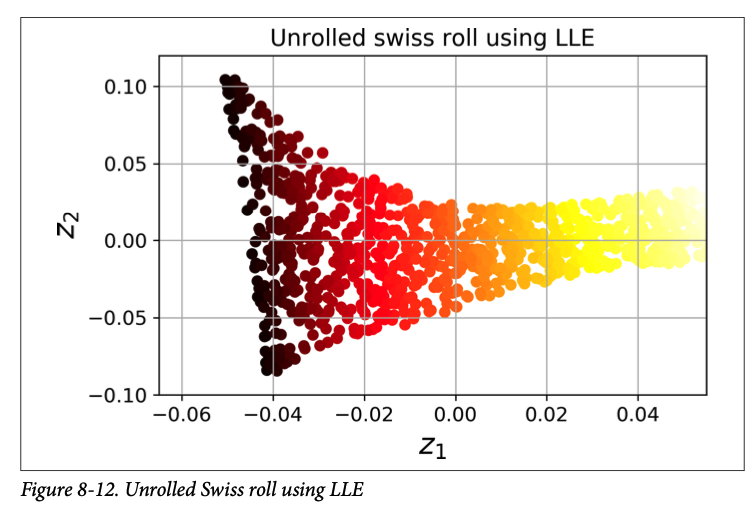


## Other Dim Reduction Techniques

* Multidimensional Scaling (MDS)
* Isomap
* T-distrubtion stochastic neighbor embeding (t-SNE)
* Linear Discriminant Analysis (LDA)

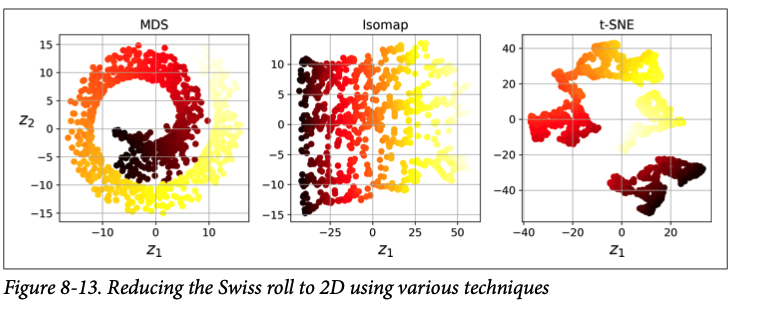
